Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Part 1

In [1]:
# Your Work Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

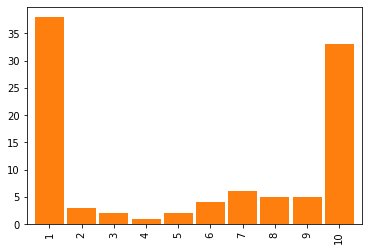

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


#plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

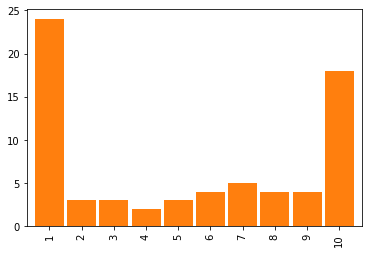

In [4]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

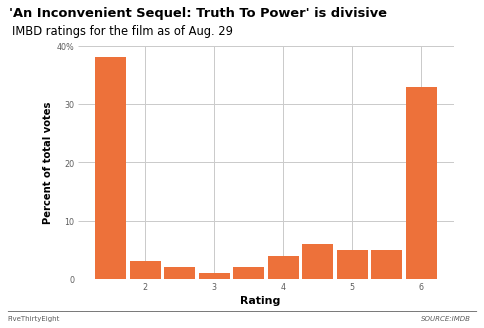

In [5]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')
# put bars on graph
ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, color='#ED713A', width=.9)

ax.set_facecolor('white')
# set x ticks

# y axis tick marks and labels
ax.set_yticks(range(0,50,10))
ax.set_yticklabels([0, 10,20,30,'40%'], fontsize=8,  color='#5E5E5E')
# x ticks labeling and color
ax.set_xticklabels((range(1,11,1)), fontsize=8,  color='#5E5E5E')
# x axis label
ax.set_xlabel('Rating', fontsize=11, fontweight='bold',x=.485, y=5,)

# y axis label
ax.set_ylabel('Percent of total votes', fontsize=10, fontweight='bold')
# sett graph title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", x=.32, y=1.1,fontsize=13, fontweight='bold')
ax.text(s='IMBD ratings for the film as of Aug. 29', x=-1.87, y=42, fontsize=11.5)
ax.text(s='______________________________________________________________________________________________', x=-2, y=-5., fontsize=10,  color='#5E5E5E')
ax.text(s="FiveThirtyEight", x=-2, y=-7,fontsize=7,color='#5E5E5E')
ax.text(s="SOURCE:IMDB", x=10, y=-7,fontsize=7,style='oblique',color='#5E5E5E')
# remove spines

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [6]:
display(example)

In [7]:
df= pd.read_csv( 'https://raw.githubusercontent.com/fivethirtyeight/WNBA-stats/master/wnba-team-elo-ratings.csv')
df.tail()

,season,date,team1,team2,name1,name2,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
10483,1997,6/21/1997,SAC,LVA,Sacramento Monarchs,Utah Starzz,0,0,73,61,1500,1500,1521,1479,0.387,0
10484,1997,6/21/1997,NYL,LAS,New York Liberty,Los Angeles Sparks,0,0,67,57,1500,1500,1519,1481,0.387,0
10485,1997,6/21/1997,LAS,NYL,Los Angeles Sparks,New York Liberty,0,0,57,67,1500,1500,1481,1519,0.613,1
10486,1997,6/21/1997,LVA,SAC,Utah Starzz,Sacramento Monarchs,0,0,61,73,1500,1500,1479,1521,0.613,1
10487,1997,6/21/1997,CLE,HOU,Cleveland Rockers,Houston Comets,0,0,56,76,1500,1500,1470,1530,0.613,1


In [8]:
df.shape

(10488, 16)

In [0]:
df['team1'].value_counts()
team1_Hou = ['HOU']

In [0]:
seasons= ['2000', '1997', '1998', '1999' ]

In [0]:
df= df[df.team1.isin(team1_Hou)]

In [0]:
df= df[df.season.isin(seasons)]

In [13]:
df.head()

,season,date,team1,team2,name1,name2,neutral,playoff,score1,score2,elo1_pre,elo2_pre,elo1_post,elo2_post,prob1,is_home1
8992,2000,8/26/2000,HOU,NYL,Houston Comets,New York Liberty,0,1,79,73,1741,1523,1743,1522,0.895,1
8994,2000,8/24/2000,HOU,NYL,Houston Comets,New York Liberty,0,1,59,52,1735,1529,1741,1523,0.712,0
8998,2000,8/20/2000,HOU,LAS,Houston Comets,Los Angeles Sparks,0,1,74,69,1724,1673,1735,1661,0.449,0
9002,2000,8/17/2000,HOU,LAS,Houston Comets,Los Angeles Sparks,0,1,77,56,1710,1686,1724,1673,0.678,1
9008,2000,8/14/2000,HOU,SAC,Houston Comets,Sacramento Monarchs,0,1,75,70,1708,1548,1710,1546,0.848,1


In [0]:
df=df.reset_index(drop=True)

In [0]:
elos= pd.Series(df['elo1_post'])

In [0]:
ads=list(range(0, 141))


In [0]:
ads.sort(reverse=True)

In [0]:
elos=elos.reindex(ads)

In [0]:
elos=elos.reset_index(drop=True)

In [20]:
elos.head()

0    1530
1    1544
2    1535
3    1558
4    1564
Name: elo1_post, dtype: int64

findfont: Font family ['economica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['economica'] not found. Falling back to DejaVu Sans.


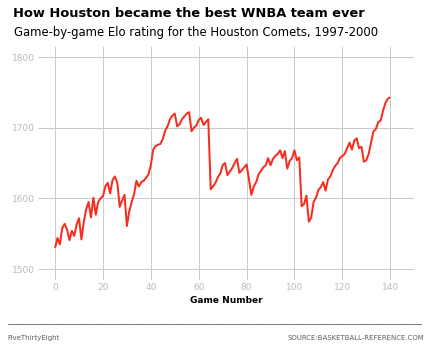

In [21]:
#plot our graph
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots()

fig.patch.set_facecolor('white')

elos.plot(linewidth=2,color='#F92C1D',)

ax.set_facecolor('white')

# label x axis
ax.set_yticklabels(range(1500,1801,100),fontsize=9, fontname='economica', color='#BBBBBB')
ax.set_xticklabels(range(0,141,20),fontsize=9, fontname='economica', color='#BBBBBB')

ax.set_xticks(range(0,141,20))
ax.set_yticks(range(1500,1801,100))

ax.set(xlim=(-7, 150), ylim=(1485,1815))

# remove spines
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Text and titles
ax.set_title("How Houston became the best WNBA team ever", x=.40, y=1.1,fontsize=13, fontweight='bold')
ax.text(s='Game-by-game Elo rating for the Houston Comets, 1997-2000', x=-17, y=1830, fontsize=11.65)
ax.text(s='___________________________________________________________________________________', x=-20, y=1425., fontsize=10,  color='#5E5E5E')
ax.text(s="FiveThirtyEight", x=-20, y=1400,fontsize=7,color='#5E5E5E')
ax.text(s="SOURCE:BASKETBALL-REFERENCE.COM", x=97, y=1400,fontsize=7,fontname='economica',color='#5E5E5E')
ax.set_xlabel('Game Number', y=1300, fontsize=9, fontweight='bold')

plt.show()

In [22]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2020/05/Paine-Cynthia-Cooper-0526-1.png?w=575'
example2 = Image(url=url, width=400)

display(example2)

## Let me know what you think maggie!
- I think after all that hassle it came out pretty dang good

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here